In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
# 결측치 정리한 데이터
df = pd.read_csv('get18.20_outlier.csv', encoding='ANSI')
df.head()

,index,Day,Holiday,Typhoon,Route_id,Route_score,In_Out,Station_code,Station_name,Latitude,...,Geton_total,Getoff_total,Commuter_count,Type_general_geton,Type_others_geton,Type_general_getoff,Type_others_getoff,Geton_18.20,RouteStationCode,Week
0,0,1,1,0,4270000,0.362711,시외,344,제주썬호텔,33.48990,...,16,0,8,15,1,0.0,0.0,0.0,"4270000 , 344",1
1,1,1,1,0,29830000,0.183871,시내,96,제주민속오일장,33.49376,...,2,0,68,2,0,2.0,0.0,2.0,"29830000 , 96",1
2,2,1,1,0,29830000,0.183871,시내,555,월평마을,33.46976,...,2,0,24,1,1,0.0,0.0,0.0,"29830000 , 555",1
3,3,1,1,0,29830000,0.183871,시내,321,제주도청신제주로터리,33.49110,...,3,3,189,1,2,2.0,1.0,1.0,"29830000 , 321",1
4,4,1,1,0,29830000,0.183871,시내,345,수협제주도지회,33.48987,...,4,0,17,3,1,0.0,0.0,0.0,"29830000 , 345",1


In [3]:
df.tail()

,index,Day,Holiday,Typhoon,Route_id,Route_score,In_Out,Station_code,Station_name,Latitude,...,Geton_total,Getoff_total,Commuter_count,Type_general_geton,Type_others_geton,Type_general_getoff,Type_others_getoff,Geton_18.20,RouteStationCode,Week
286701,415417,30,0,0,27290000,0.082509,시내,2201,하천리중동,33.34723,...,5,0,11,1,4,0.0,0.0,0.0,"27290000 , 2201",2
286702,415418,30,0,0,31890000,0.186757,시내,358,한라병원,33.48963,...,4,3,357,3,1,2.0,1.0,8.0,"31890000 , 358",2
286703,415419,30,0,0,31890000,0.186757,시외,391,삼무공원사거리,33.48990,...,2,2,125,1,1,2.0,0.0,4.0,"31890000 , 391",2
286704,415421,30,0,0,23290000,0.172075,시내,292,천수동,33.50934,...,28,9,243,21,7,5.0,4.0,7.0,"23290000 , 292",2
286705,415422,30,0,0,24200000,0.082203,시내,122,인다마을,33.47064,...,8,0,222,7,1,0.0,0.0,1.0,"24200000 , 122",2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286706 entries, 0 to 286705
Data columns (total 30 columns):
index                  286706 non-null int64
Day                    286706 non-null int64
Holiday                286706 non-null int64
Typhoon                286706 non-null int64
Route_id               286706 non-null int64
Route_score            286706 non-null float64
In_Out                 286706 non-null object
Station_code           286706 non-null int64
Station_name           286706 non-null object
Latitude               286706 non-null float64
Longitude              286706 non-null float64
Transfer               286706 non-null int64
Airport                286706 non-null int64
Terminal               286706 non-null int64
School                 286706 non-null int64
Bus_interval           286706 non-null float64
Geton_6.9              286706 non-null int64
Geton_9.12             286706 non-null int64
Getoff_6.9             286706 non-null int64
Getoff_9.12            2

### 반응변수 기술통계량

In [5]:
df['Geton_18.20'].describe()

count    286706.000000
mean          1.661559
std           5.485680
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         265.000000
Name: Geton_18.20, dtype: float64

In [57]:
df['Geton_18.20'].value_counts(normalize=True)

0.000      0.640015
1.000      0.117525
2.000      0.069950
3.000      0.037694
4.000      0.025392
             ...   
7.625      0.000003
158.000    0.000003
155.000    0.000003
28.750     0.000003
90.000     0.000003
Name: Geton_18.20, Length: 334, dtype: float64

Text(0.5, 1.0, 'Geton_18.20 분포')

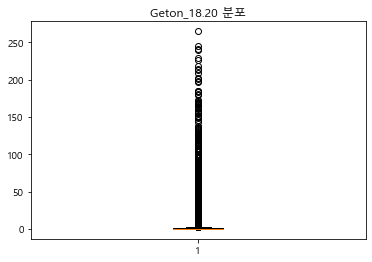

In [46]:
boxplot(df['Geton_18.20'])
plt.title('Geton_18.20 분포')

### 공휴일에 따른 반응변수

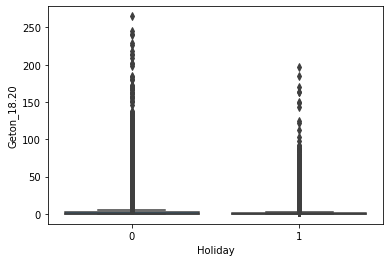

In [13]:
sns.boxplot(x='Holiday', y='Geton_18.20', data=df)

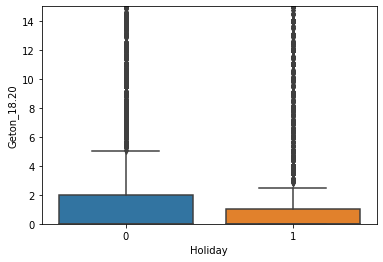

In [15]:
plt.figure()
sns.boxplot(x='Holiday', y='Geton_18.20', data=df)
plt.ylim(0, 15)
plt.show()

### 요일별 반응변수

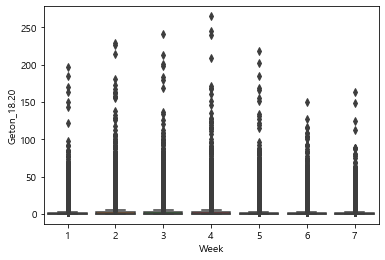

In [43]:
sns.boxplot(x='Week', y='Geton_18.20', data=df)

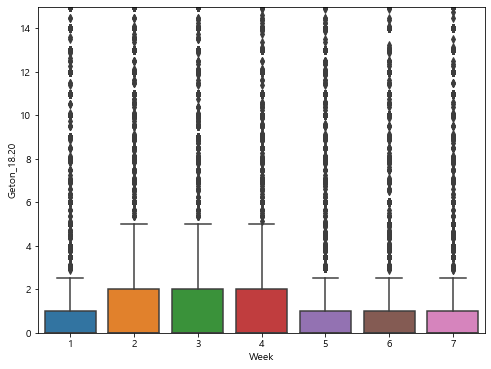

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Week', y='Geton_18.20', data=df)
plt.ylim(0, 15)
plt.show()

### 태풍 영향에 따른 반응변수

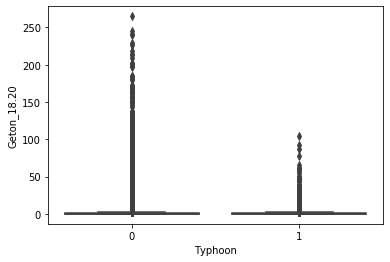

In [16]:
sns.boxplot(x='Typhoon', y='Geton_18.20', data=df)

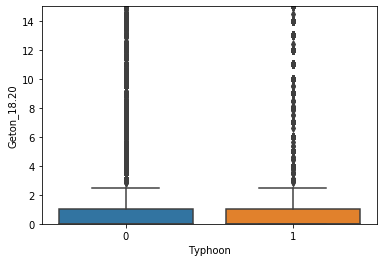

In [17]:
plt.figure()
sns.boxplot(x='Typhoon', y='Geton_18.20', data=df)
plt.ylim(0, 15)
plt.show()

### 노선이 흩어진 정도에 따른 반응변수

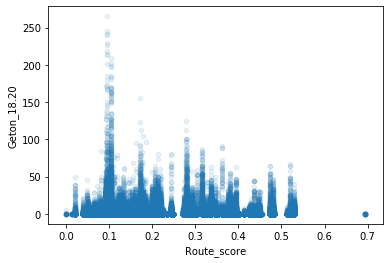

In [19]:
df.plot.scatter(x='Route_score', y='Geton_18.20', alpha=0.1)

### 시내-시외 버스 여부에 따른 반응변수

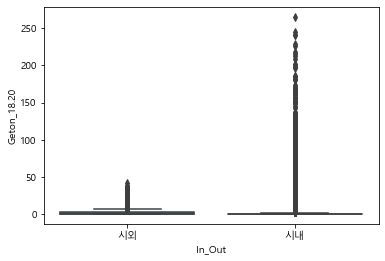

In [22]:
sns.boxplot(x='In_Out', y='Geton_18.20', data=df)

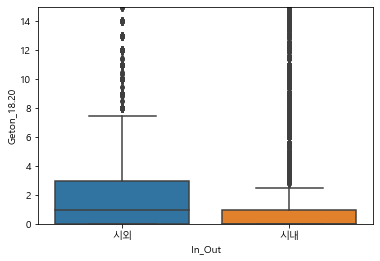

In [23]:
plt.figure()
sns.boxplot(x='In_Out', y='Geton_18.20', data=df)
plt.ylim(0, 15)
plt.show()

### 환승 정류장 여부에 따른 반응변수

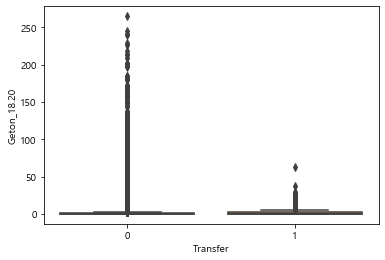

In [24]:
sns.boxplot(x='Transfer', y='Geton_18.20', data=df)

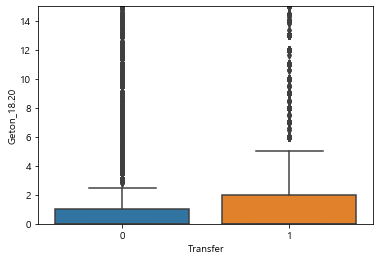

In [25]:
plt.figure()
sns.boxplot(x='Transfer', y='Geton_18.20', data=df)
plt.ylim(0, 15)
plt.show()

### 공항 정류장 여부에 따른 반응변수

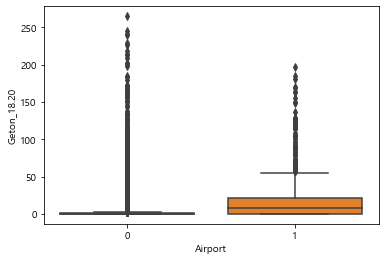

In [26]:
sns.boxplot(x='Airport', y='Geton_18.20', data=df)

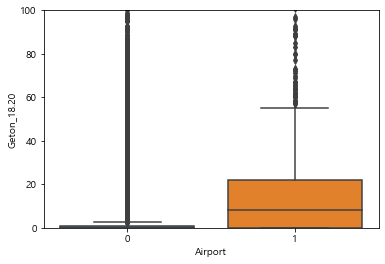

In [28]:
plt.figure()
sns.boxplot(x='Airport', y='Geton_18.20', data=df)
plt.ylim(0, 100)
plt.show()

### 터미널 정류장 여부에 따른 반응변수

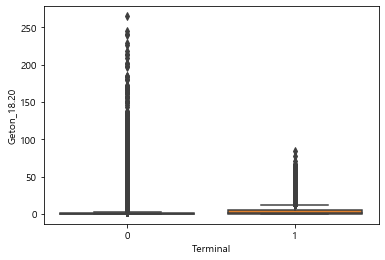

In [29]:
sns.boxplot(x='Terminal', y='Geton_18.20', data=df)

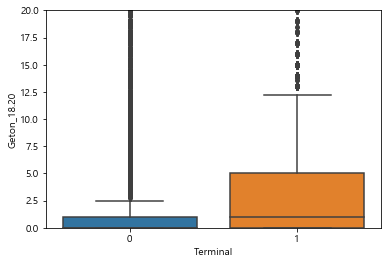

In [31]:
plt.figure()
sns.boxplot(x='Terminal', y='Geton_18.20', data=df)
plt.ylim(0, 20)
plt.show()

### 학교 정류장 여부에 따른 반응변수

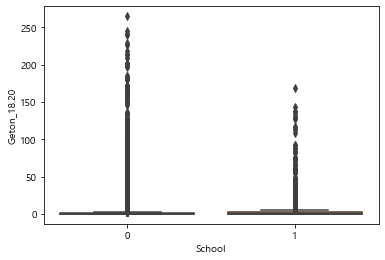

In [32]:
sns.boxplot(x='School', y='Geton_18.20', data=df)

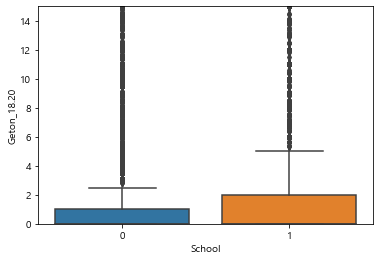

In [33]:
plt.figure()
sns.boxplot(x='School', y='Geton_18.20', data=df)
plt.ylim(0, 15)
plt.show()

### 버스 배차간격에 따른 반응변수

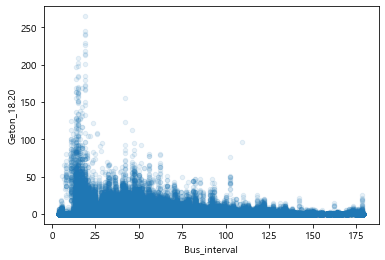

In [4]:
df.plot.scatter(x='Bus_interval', y='Geton_18.20', alpha=0.1)

### 규칙적인 통근자 수에 따른 반응변수

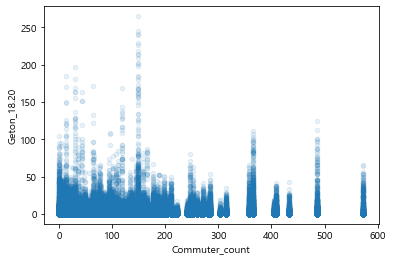

In [37]:
df.plot.scatter(x='Commuter_count', y='Geton_18.20', alpha=0.1)

### 승객 유형별 승하차인원에 따른 반응변수

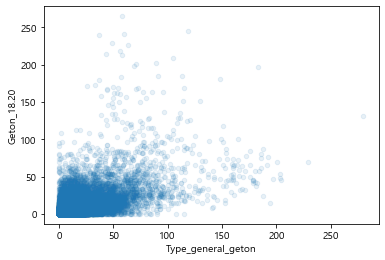

In [39]:
df.plot.scatter(x='Type_general_geton', y='Geton_18.20', alpha=0.1)

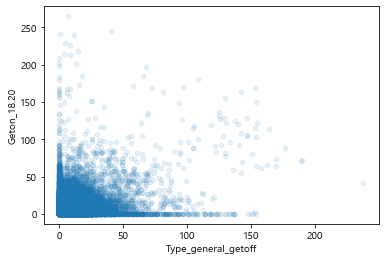

In [40]:
df.plot.scatter(x='Type_general_getoff', y='Geton_18.20', alpha=0.1)

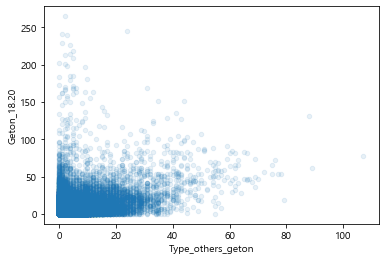

In [41]:
df.plot.scatter(x='Type_others_geton', y='Geton_18.20', alpha=0.1)

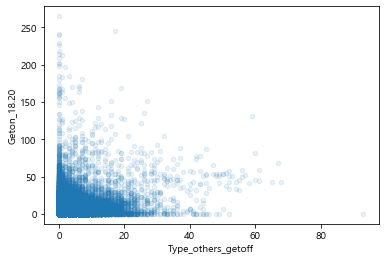

In [42]:
df.plot.scatter(x='Type_others_getoff', y='Geton_18.20', alpha=0.1)

### 날짜순으로 정렬한 반응변수

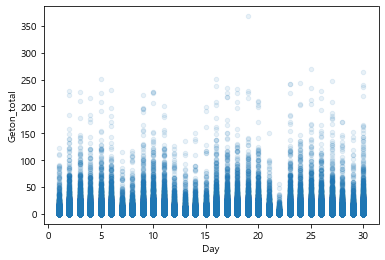

In [48]:
df.plot.scatter(x='Day', y='Geton_total', alpha=0.1)

### 라벨 인코딩

In [51]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['In_Out'] = encoder.fit_transform(df['In_Out'])
encoder.classes_

array(['시내', '시외'], dtype=object)

### 최종 데이터 heatmap

In [54]:
df_corr = df.copy()
df_corr.drop(['index', 'Day', 'Route_id', 'Station_code', 'Station_name', 'RouteStationCode'], axis=1, inplace=True)

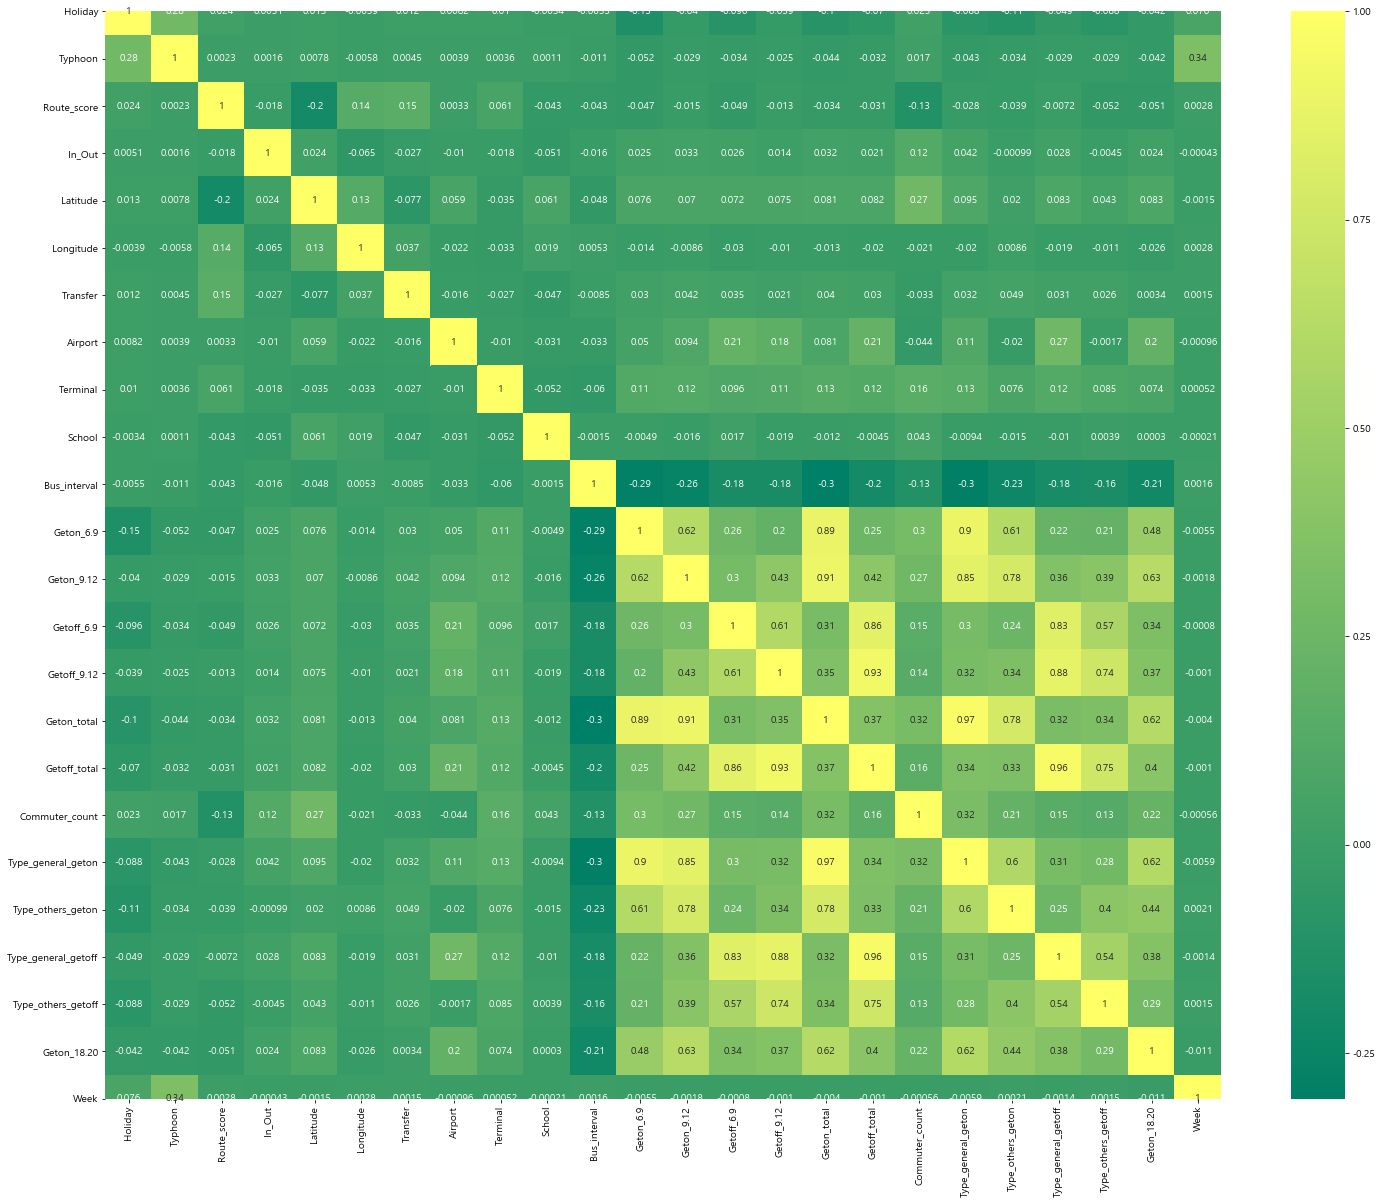

In [55]:
plt.figure(figsize=(25,20))
sns.heatmap(df_corr.corr(), annot=True, cmap='summer')
plt.show()